In [1]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

1.4266509523221116e-13


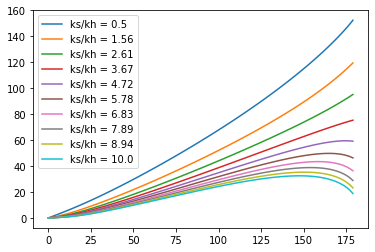

In [2]:
############ kontrola - momentova rovnovaha musi sedet
def forces(alfa,phisfcn,koefs,koefh,pomeryfcn):
    a = 0.7
    b = 0.8
    c = 0.9
    d = 1.1
    phi0 = 0*np.pi/180
    phih = alfa-phisfcn #chybi phi0
    ####### RAMENA #####
    
    kh = 1
    ks = pomeryfcn
    xs = np.sqrt(a**2+b**2-2*a*b*np.cos(phisfcn))
    rs = a*b*np.sin(phisfcn)/xs
    xh = np.sqrt(c**2+d**2-2*c*d*np.cos(phih))
    rh = d*c*np.sin(phih)/xh
    Fs = ks*xs**koefs
    Fh = xh**koefh
    eq = Fs*rs-Fh*rh
    return eq


phis,alfa,pomery = sp.symbols('phis,alfa,pomery')
a = 0.7
b = 0.8
c = 0.9
d = 1.1
phi0 = 0*np.pi/180
phih = alfa-phis #chybi phi0
l0=0
kh = 1
ks = pomery
xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
koefs = 1.5
koefh = 2.5
Uc = (ks*xs**(koefs+1))/(koefs+1)+(kh*xh**(koefh+1))/(koefh+1) #bez l0
dUc = sp.diff(Uc,phis)
eq_root = sp.lambdify([phis,alfa,pomery], dUc, 'numpy')
eq_minimize = sp.lambdify([phis,alfa,pomery], Uc, 'numpy')
N = 100
NG = 10
alfa_start = 0.1*np.pi/180
alfa_end = 179*np.pi/180

alfavec = np.linspace(alfa_start,alfa_end,N)
phisvec = np.zeros((N,NG))
lsvec = np.zeros((N,NG))
min_pomer = 0.5
max_pomer = 10
pomery = np.linspace(min_pomer,max_pomer,NG)
for j in range(NG):
    root = 0.01
    for i in range(N):
        def fun_root(x):
            return eq_root(x,alfavec[i],pomery[j])
        def fun_minimize(x):
            return eq_minimize(x,alfavec[i],pomery[j])
        # optimize = minimize(fun_root, root, method='Newton-CG')
        # phisvec[i,j] = root
        root = fsolve(fun_root, [root])
        mnmz = minimize(fun_minimize,root)
        phisvec[i,j] = mnmz.x
        # 
 
forces_eq = np.zeros(N)
k = 6
for i in range(N):
    forces_eq[i] = forces(alfavec[i],phisvec[i,k],koefs,koefh,pomery[k])
print(sum(forces_eq))    
import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.legend()
plt.show()

<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in true_divide
  return (l0s**2*pomery*sin(phis)/sqrt(2 - 2*cos(phis)) - 2*l0s*pomery*sin(phis) + pomery*sqrt(2 - 2*cos(phis))*sin(phis))/(exp(1000*l0s - 1000*sqrt(2 - 2*cos(phis))) + 1) + (l0h**3*sin(alfa - phis)/sqrt(2 - 2*cos(alfa - phis)) - 3*l0h**2*sin(alfa - phis) + 3*l0h*sqrt(2 - 2*cos(alfa - phis))*sin(alfa - phis) - (2 - 2*cos(alfa - phis))*sin(alfa - phis))/(exp(1000*l0h - 1000*sqrt(2 - 2*cos(alfa - phis))) + 1) - 1000*((1/4)*l0h**4 - l0h**3*sqrt(2 - 2*cos(alfa - phis)) + (3/2)*l0h**2*(2 - 2*cos(alfa - phis)) - l0h*(2 - 2*cos(alfa - phis))**(3/2) + (1/4)*(2 - 2*cos(alfa - phis))**2)*exp(1000*l0h - 1000*sqrt(2 - 2*cos(alfa - phis)))*sin(alfa - phis)/(sqrt(2 - 2*cos(alfa - phis))*(exp(1000*l0h - 1000*sqrt(2 - 2*cos(alfa - phis))) + 1)**2) + 1000*(-1/3*l0s**3*pomery + l0s**2*pomery*sqrt(2 - 2*cos(phis)) - l0s*pomery*(2 - 2*cos(phis)) + (1/3)*pomery*(2 - 2*cos(phis))**(3/2))*exp(1000*l0s - 1000*sqrt(2 - 2*cos(phis

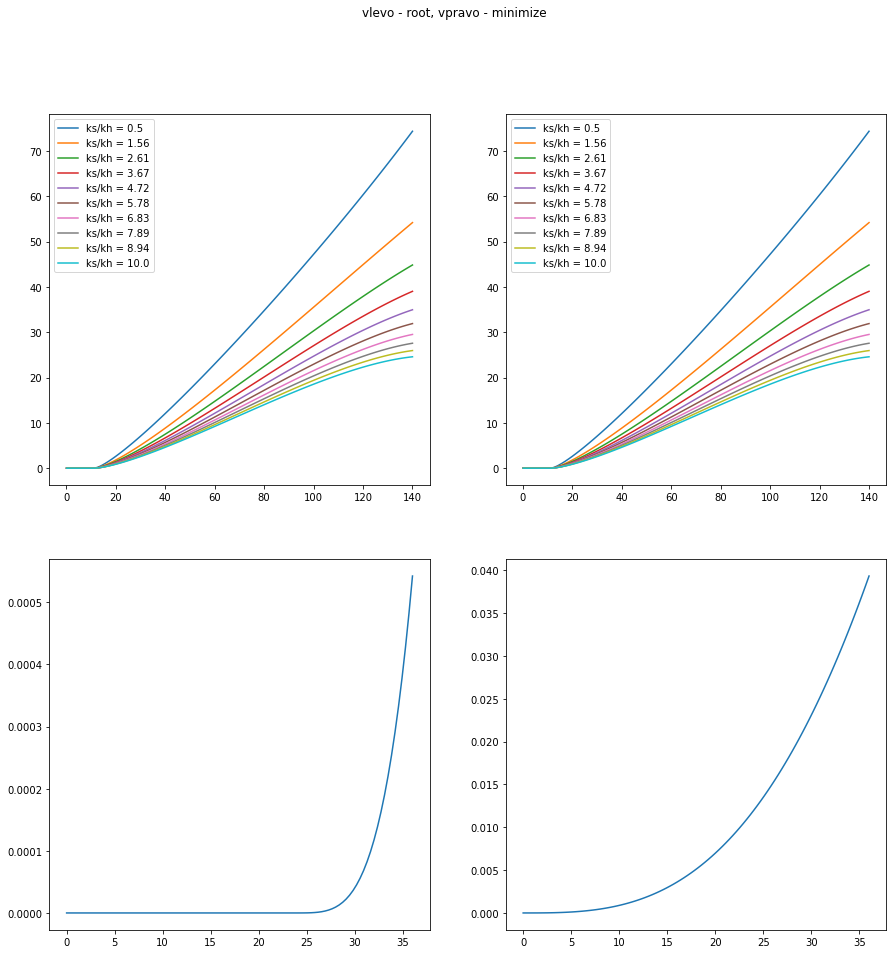

6.783921378582113e-07
(l0h**4/4 - l0h**3*sqrt(2 - 2*cos(alfa - phis)) + 3*l0h**2*(2 - 2*cos(alfa - phis))/2 - l0h*(2 - 2*cos(alfa - phis))**(3/2) + (2 - 2*cos(alfa - phis))**2/4)/(exp(1000*l0h - 1000*sqrt(2 - 2*cos(alfa - phis))) + 1)


In [3]:
####### Odvozeni pomoci sympy cele
import numpy as np
from scipy.optimize import fsolve
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')

def forces(alfa,phisfcn,koefs,koefh,pomeryfcn,l0s,l0h):
    a = 1
    b = 1
    c = 1
    d = 1
    phi0 = 0*np.pi/180
    phih = alfa-phisfcn #chybi phi0
    
    kh = 1
    ks = pomeryfcn
    xs = np.sqrt(a**2+b**2-2*a*b*np.cos(phisfcn))
    rs = a*b*np.sin(phisfcn)/xs
    xh = np.sqrt(c**2+d**2-2*c*d*np.cos(phih))
    rh = d*c*np.sin(phih)/xh
    if xs < l0s:
        Fs = 0
    else:
        Fs = ks*(xs-l0s)**koefs
    
    if xh < l0h:
        Fh = 0
    else:
        Fh = kh*(xh-l0h)**koefh
        
    eq = Fs*rs-Fh*rh
    return eq


phis,alfa,pomery,l0s,l0h,x = sp.symbols('phis,alfa,pomery,l0s,l0h,x')
a = 1
b = 1
c = 1
d = 1
kh = 1
ks = kh*pomery
phi0 = 0*np.pi/180
phih = alfa-phi0-phis
a_fun_coef = 1000
### Aktivacni funkce
# sigmoid
a_funs = 1/(1+sp.exp(a_fun_coef*(l0s-x)))
a_funh = 1/(1+sp.exp(a_fun_coef*(l0h-x)))
# tanh
# a_funs = sp.tanh(-a_fun_coef*(l0s-x))
# a_funh = sp.tanh(-a_fun_coef*(l0h-x))

xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
koefs = 2
koefh = 3
Fs = ks*(x-l0s)**(koefs) #chybi l0 l0s-
Fh = kh*(x-l0h)**(koefh) #chybi l0 l0h-
Us = sp.integrate(Fs,(x,l0s,x))
Uh = sp.integrate(Fh,(x,l0h,x))
Us_act = a_funs*Us #chybi act
Uh_act = a_funh*Uh #chybi act
Us_act = Us_act.subs(x,xs)
Uh_act = Uh_act.subs(x,xh)
U_C = Us_act+Uh_act
U_C_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],U_C, 'numpy')
Uh_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],Uh_act, 'numpy')
Us_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],Us_act, 'numpy')
dUs = sp.diff(Us_act,phis)
dUh = sp.diff(Uh_act,phis)
dU_C = dUs+dUh
dU_C_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],dU_C, 'numpy')

# result = Us_act_np(phis_val, alfa_val, pomery_val, l0_val, x_val)

N = 100
NG = 10
alfa_start = 0.1*np.pi/180
alfa_end = 140*np.pi/180

alfavec = np.linspace(alfa_start,alfa_end,N)
phisvec_root = np.zeros((N,NG))
phisvec_minimize = np.zeros((N,NG))
lsvec = np.zeros((N,NG))
min_pomer = 0.5
max_pomer = 10
pomery = np.linspace(min_pomer,max_pomer,NG)
l0ss = 0
l0hh = 0.2
root = 0.1
bnds = (0, np.pi/2)
for j in range(NG):
    root = 0.8
    for i in range(N):
        
        def fun_root(x):
            return dU_C_np(x,alfavec[i],pomery[j],l0ss,l0hh,0)
        def fun_minimize(x):
            return U_C_np(x,alfavec[i],pomery[j],l0ss,l0hh,0)
        
        root = fsolve(fun_root, [root])
        mnmz = minimize(fun_minimize,root,bounds=[bnds])
        phisvec_root[i,j] = root
        phisvec_minimize[i,j] = mnmz.x
        
forces_eq = np.zeros(N)
k = 6
for i in range(N):
    forces_eq[i] = forces(alfavec[i],phisvec_root[i,k],koefs,koefh,pomery[k],l0ss,l0hh)

alfa_rig = 12
pomer_rig = 0.5
phisvec = np.linspace(0,np.pi/5,100)
Uh = Uh_np(phisvec,alfa_rig*np.pi/180,pomer_rig,l0ss,l0hh,0)
Us = Us_np(phisvec,alfa_rig*np.pi/180,pomer_rig,l0ss,l0hh,0)

fig, axs = plt.subplots(2,2, figsize=(15, 15))
fig.suptitle('vlevo - root, vpravo - minimize')  
alfavec = alfavec*180/np.pi
phisvec_root = phisvec_root*180/np.pi
phisvec_minimize = phisvec_minimize*180/np.pi
for i in range(NG):
    axs[0,0].plot(alfavec,phisvec_root[:,i],label='ks/kh = %s' % round(pomery[i],2))
    axs[0,1].plot(alfavec,phisvec_minimize[:,i],label='ks/kh = %s' % round(pomery[i],2))
axs[1,1].plot(phisvec*180/np.pi,Us)
axs[1,0].plot(phisvec*180/np.pi,Uh)
axs[0,0].legend()
axs[0,1].legend()
plt.show()
print(sum(forces_eq))
print(Uh_act)

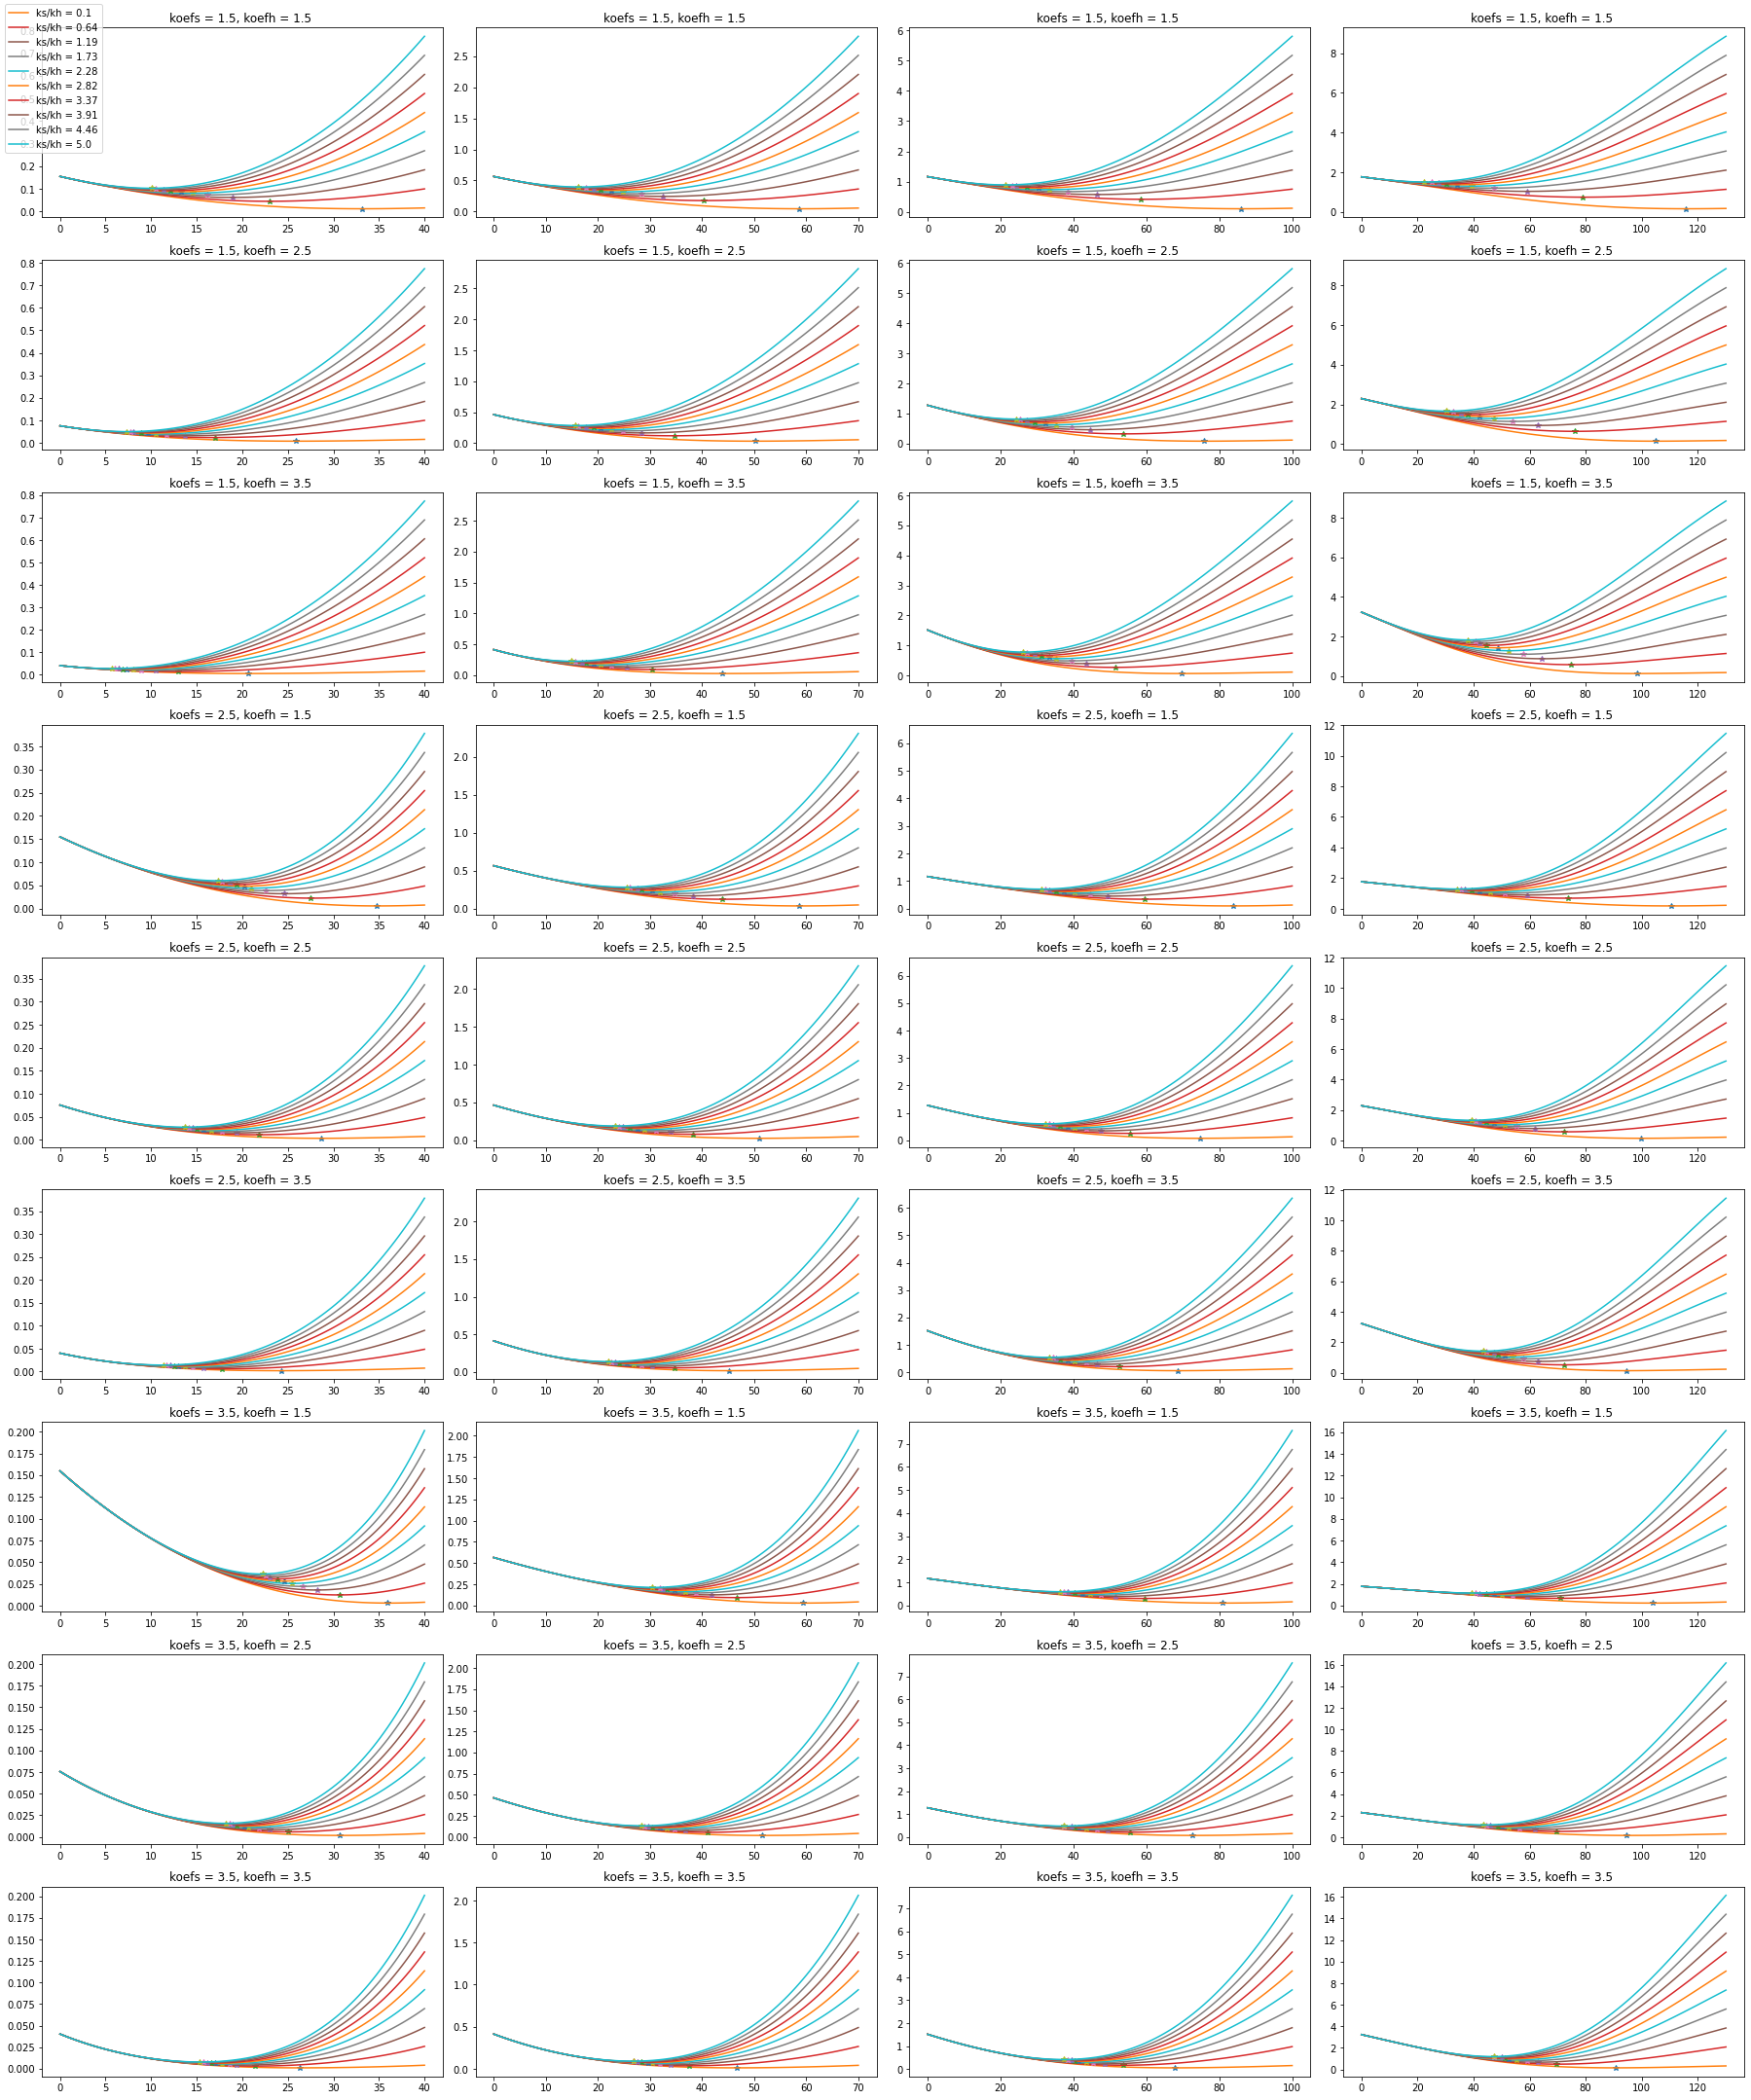

In [4]:
#grafy potencialni energie pro ruzne promenne
import warnings
warnings.filterwarnings('ignore')

phis,alfa,pomery,l0s,l0h,koefs,koefh,x = sp.symbols('phis,alfa,pomery,l0s,l0h,koefs,koefh,x')
a = 1
b = 1
c = 1
d = 1
kh = 1
ks = kh*pomery
phi0 = 0*np.pi/180
phih = alfa-phi0-phis
a_fun_coef = 1000
### Aktivacni funkce
# sigmoid
a_funs = 1/(1+sp.exp(a_fun_coef*(l0s-x)))
a_funh = 1/(1+sp.exp(a_fun_coef*(l0h-x)))
# tanh
# a_funs = sp.tanh(-a_fun_coef*(l0s-x))
# a_funh = sp.tanh(-a_fun_coef*(l0h-x))

xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
Fs = ks*(x-l0s)**(koefs)
Fh = kh*(x-l0h)**(koefh)
Us = sp.integrate(Fs,(x,l0s,x))
Uh = sp.integrate(Fh,(x,l0h,x))
Us_act = a_funs*Us #chybi act
Uh_act = a_funh*Uh #chybi act
Us_act = Us_act.subs(x,xs)
Uh_act = Uh_act.subs(x,xh)
U_C = Us_act+Uh_act
U_C_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,koefs,koefh],U_C, 'numpy')


alfa = np.array([40,70,100,130])*np.pi/180
phis = np.linspace(0,alfa,100)
koefs = np.array([1.5,2.5,3.5])
koefh = np.array([1.5,2.5,3.5])
N_koef = len(koefs)*len(koefh)
N_alfa = len(alfa)
NG = 10
min_pomer = 0.1
max_pomer = 5
pomery = np.linspace(min_pomer,max_pomer,NG)
l0s = 0
l0h = 0

fig, axs = plt.subplots(N_koef,N_alfa, figsize=(25, 30))
# fig.suptitle('vlevo - root, vpravo - minimize')
labels = ['1','2','3','4']
# for i in range(len(pomery)):
#     labels.append("ks/kh = %s " % round(pomery[i],2))
for i in range(len(koefs)):
    for j in range(len(koefh)):
        for k in range(len(pomery)):
            UC = U_C_np(phis,alfa,pomery[k],l0s,l0h,koefs[i],koefh[j])
            for a in range(len(alfa)):
                ## minimum UC
                min_UC = UC[:,a].argmin()
                axs[j+len(koefs)*i,a].plot(phis[min_UC,a]*180/np.pi,UC[min_UC,a],'*')
                ## 
                
                axs[j+len(koefs)*i,a].plot(phis[:,a]*180/np.pi,UC[:,a],label='ks/kh = %s' % round(pomery[k],2))
                axs[j+len(koefs)*i,a].title.set_text('koefs = %s, koefh = %s ' % (koefs[i],koefh[j]))  

# lines = []
# labels = []
# for axs in fig.axes:
#     Line, Label = axs.get_legend_handles_labels()
#     # print(Label)
#     lines.extend(Line)
#     labels.extend(Label)

line, label = axs[0,0].get_legend_handles_labels()
fig.legend(line, label, loc='upper left')
fig.tight_layout()
plt.show()

        

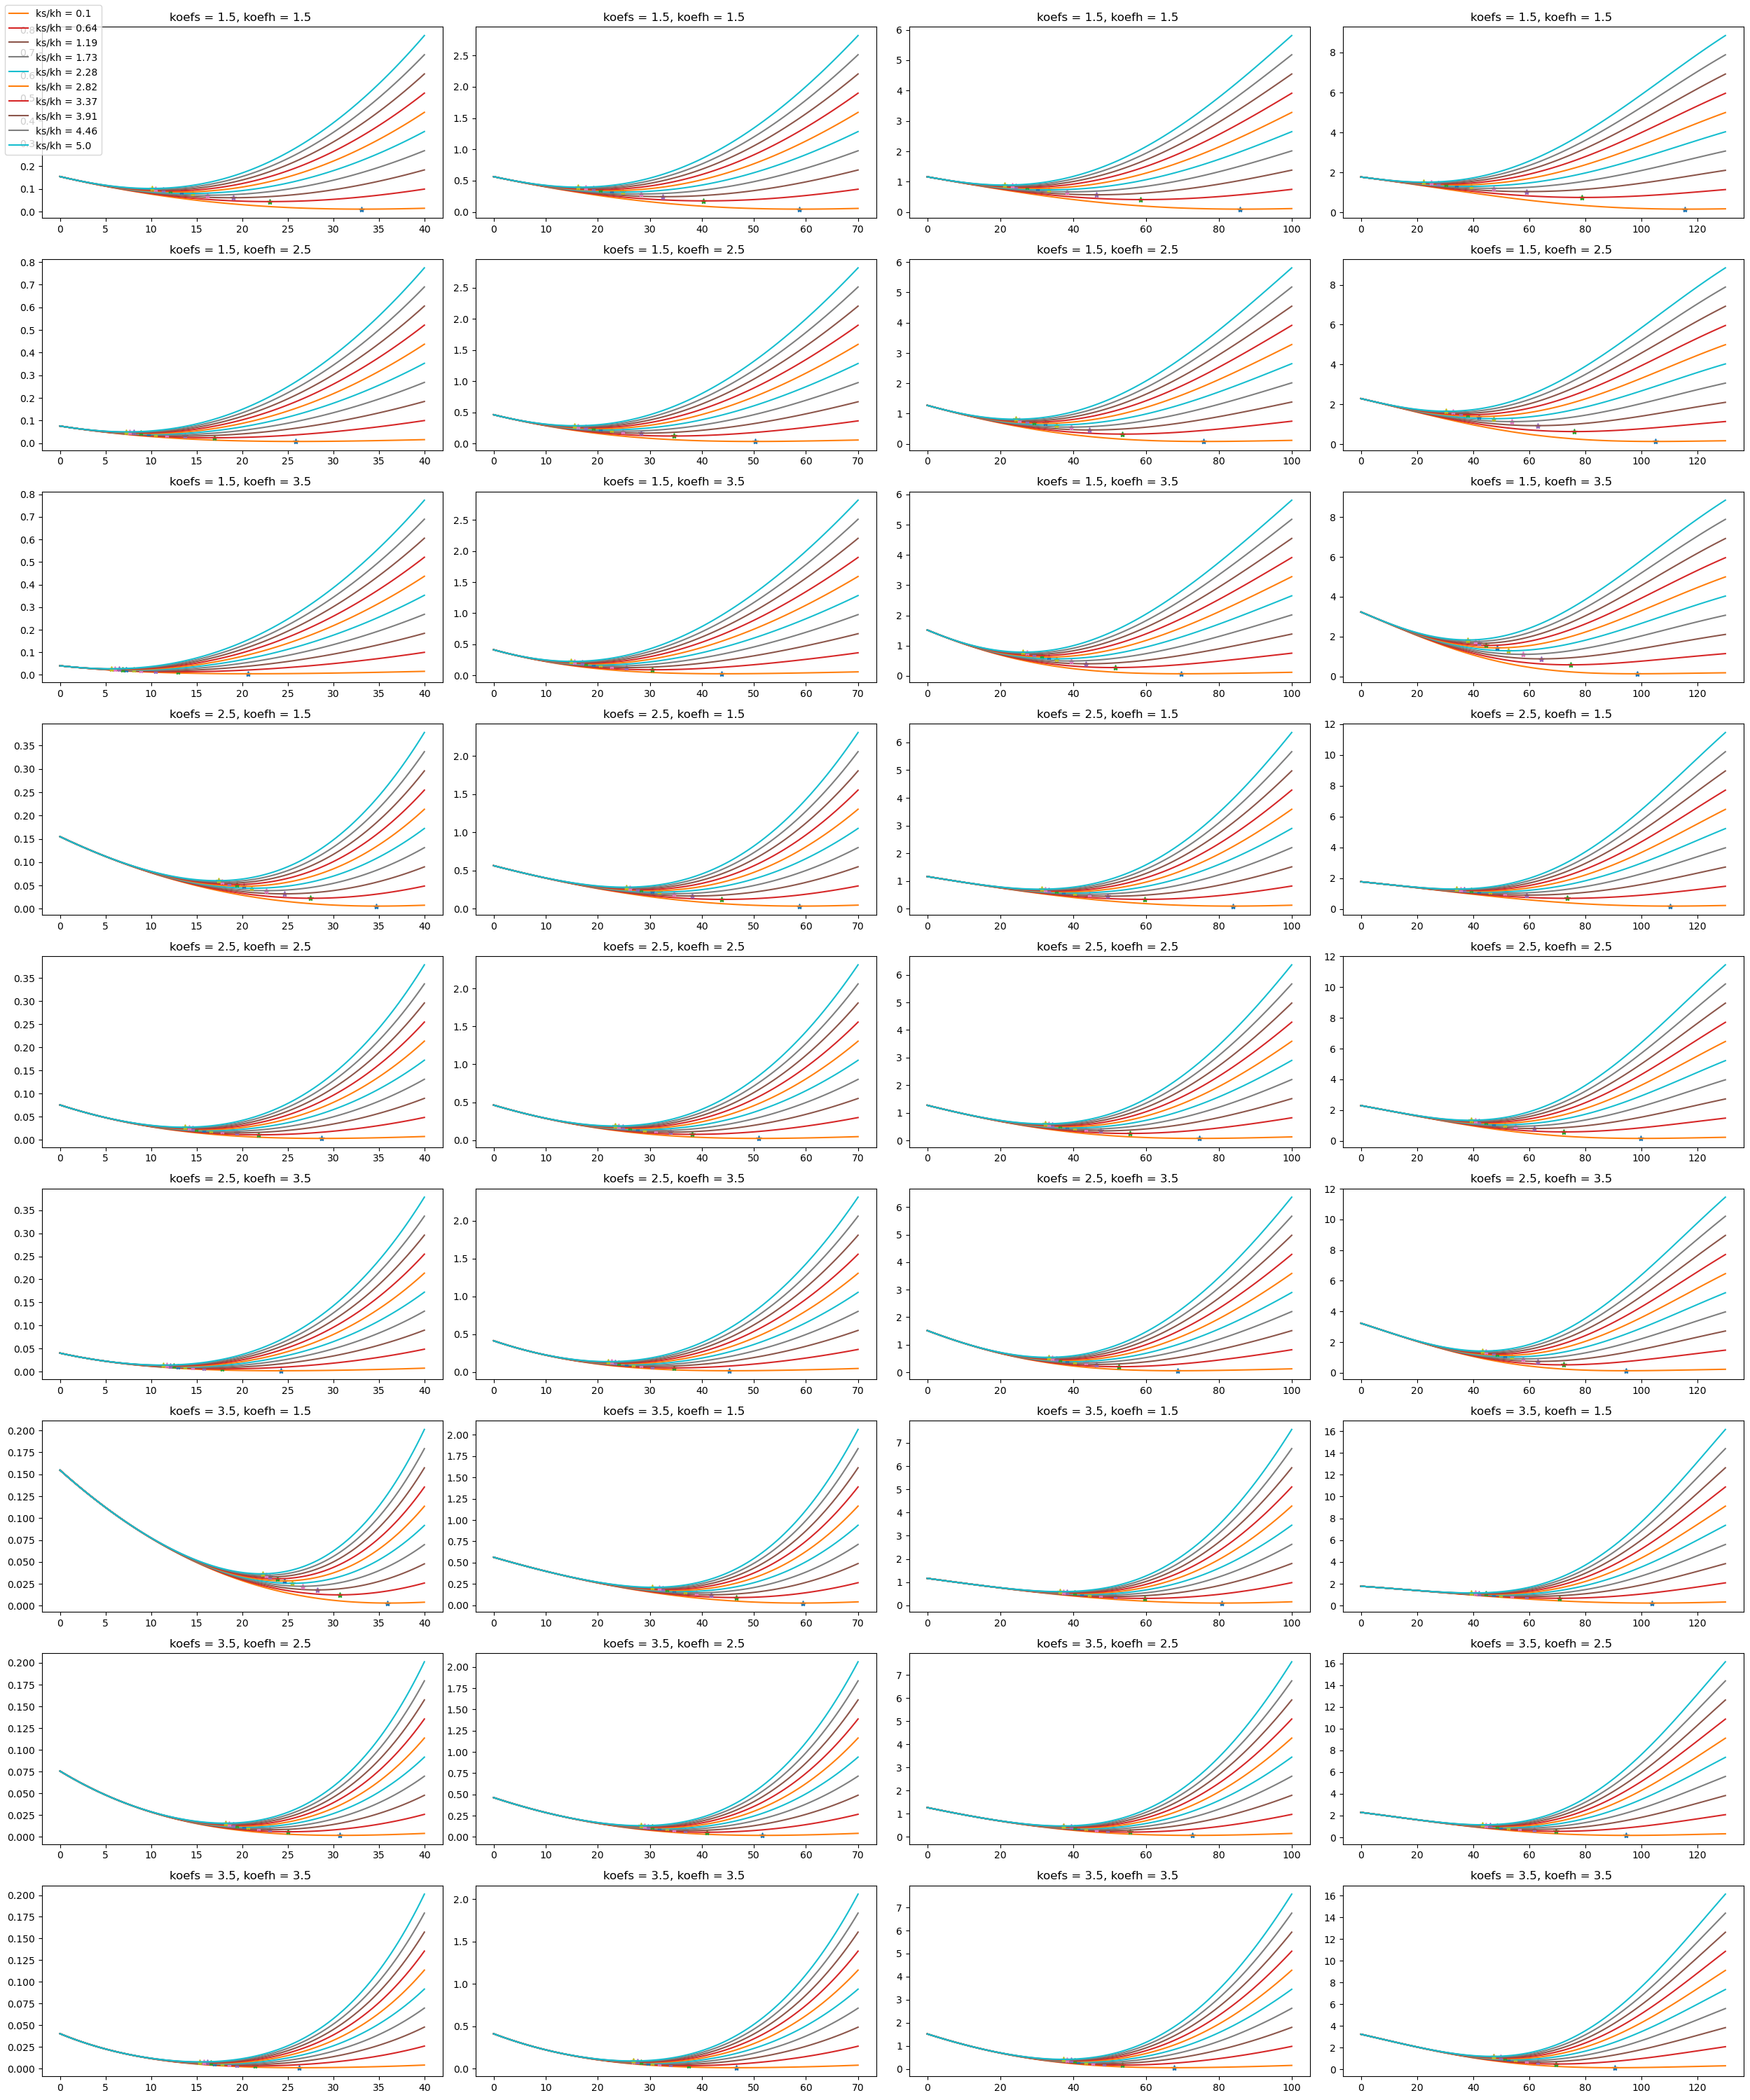

In [2]:
#grafy potencialni energie pro ruzne promenne
import warnings
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

phis,alfa,pomery,l0s,l0h,koefs,koefh,x = sp.symbols('phis,alfa,pomery,l0s,l0h,koefs,koefh,x')
a = 1
b = 1
c = 1
d = 1
kh = 1
ks = kh*pomery
phi0 = 0*np.pi/180
phih = alfa-phi0-phis
a_fun_coef = 1000
### Aktivacni funkce
# sigmoid
a_funs = 1/(1+sp.exp(a_fun_coef*(l0s-x)))
a_funh = 1/(1+sp.exp(a_fun_coef*(l0h-x)))
# tanh
# a_funs = sp.tanh(-a_fun_coef*(l0s-x))
# a_funh = sp.tanh(-a_fun_coef*(l0h-x))

xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
Fs = ks*(x-l0s)**(koefs)
Fh = kh*(x-l0h)**(koefh)
Us = sp.integrate(Fs,(x,l0s,x))
Uh = sp.integrate(Fh,(x,l0h,x))
Us_act = a_funs*Us #chybi act
Uh_act = a_funh*Uh #chybi act
Us_act = Us_act.subs(x,xs)
Uh_act = Uh_act.subs(x,xh)
U_C = Us_act+Uh_act
U_C_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,koefs,koefh],U_C, 'numpy')


alfa = np.array([40,70,100,130])*np.pi/180
phis = np.linspace(0,alfa,100)
koefs = np.array([1.5,2.5,3.5])
koefh = np.array([1.5,2.5,3.5])
N_koef = len(koefs)*len(koefh)
N_alfa = len(alfa)
NG = 10
min_pomer = 0.1
max_pomer = 5
pomery = np.linspace(min_pomer,max_pomer,NG)
l0s = 0
l0h = 0

fig, axs = plt.subplots(N_koef,N_alfa, figsize=(25, 30))
# fig.suptitle('vlevo - root, vpravo - minimize')
labels = ['1','2','3','4']
# for i in range(len(pomery)):
#     labels.append("ks/kh = %s " % round(pomery[i],2))
for i in range(len(koefs)):
    for j in range(len(koefh)):
        for k in range(len(pomery)):
            UC = U_C_np(phis,alfa,pomery[k],l0s,l0h,koefs[i],koefh[j])
            for a in range(len(alfa)):
                ## minimum UC
                min_UC = UC[:,a].argmin()
                axs[j+len(koefs)*i,a].plot(phis[min_UC,a]*180/np.pi,UC[min_UC,a],'*')
                ## 
                
                axs[j+len(koefs)*i,a].plot(phis[:,a]*180/np.pi,UC[:,a],label='ks/kh = %s' % round(pomery[k],2))
                axs[j+len(koefs)*i,a].title.set_text('koefs = %s, koefh = %s ' % (koefs[i],koefh[j]))  

# lines = []
# labels = []
# for axs in fig.axes:
#     Line, Label = axs.get_legend_handles_labels()
#     # print(Label)
#     lines.extend(Line)
#     labels.extend(Label)

line, label = axs[0,0].get_legend_handles_labels()
fig.legend(line, label, loc='upper left')
fig.tight_layout()
plt.show()

        

# Thelen model

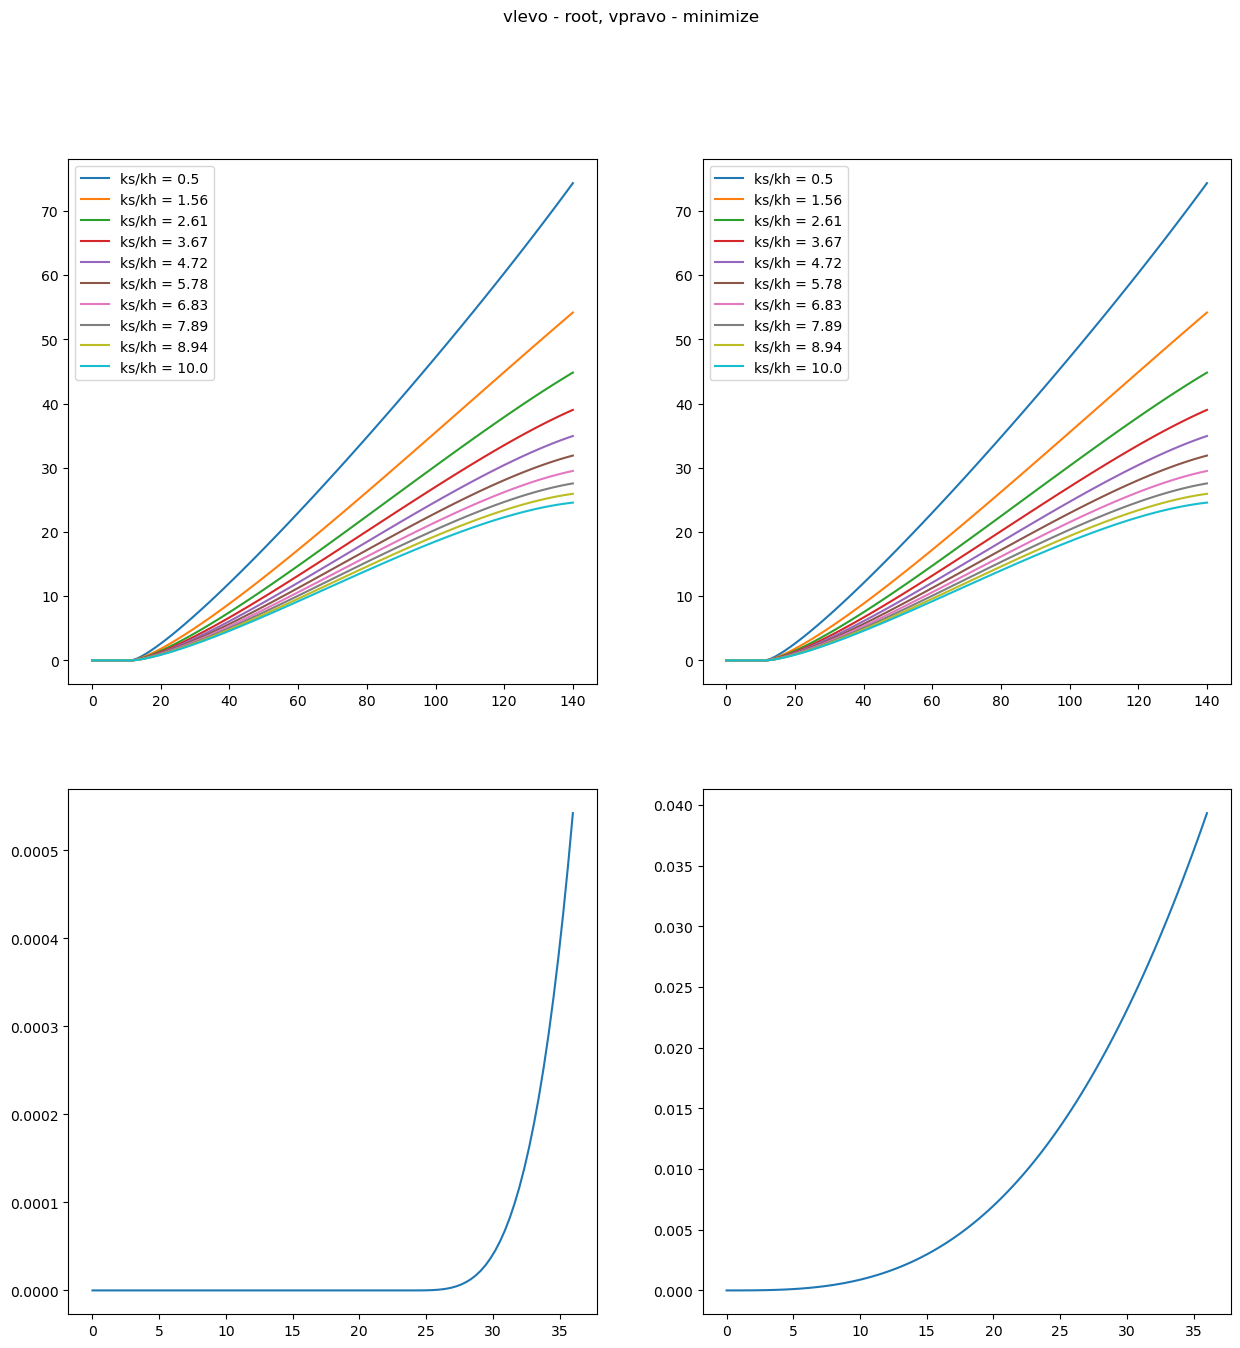

6.783921378582113e-07
(l0h**4/4 - l0h**3*sqrt(2 - 2*cos(alfa - phis)) + 3*l0h**2*(2 - 2*cos(alfa - phis))/2 - l0h*(2 - 2*cos(alfa - phis))**(3/2) + (2 - 2*cos(alfa - phis))**2/4)/(exp(1000*l0h - 1000*sqrt(2 - 2*cos(alfa - phis))) + 1)


In [12]:
####### Odvozeni pomoci sympy cele
import numpy as np
from scipy.optimize import fsolve
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')

def forces(alfa,phisfcn,koefs,koefh,pomeryfcn,l0s,l0h):
    a = 1
    b = 1
    c = 1
    d = 1
    phi0 = 0*np.pi/180
    phih = alfa-phisfcn #chybi phi0
    
    kh = 1
    ks = pomeryfcn
    xs = np.sqrt(a**2+b**2-2*a*b*np.cos(phisfcn))
    rs = a*b*np.sin(phisfcn)/xs
    xh = np.sqrt(c**2+d**2-2*c*d*np.cos(phih))
    rh = d*c*np.sin(phih)/xh
    if xs < l0s:
        Fs = 0
    else:
        Fs = ks*(xs-l0s)**koefs
    
    if xh < l0h:
        Fh = 0
    else:
        Fh = kh*(xh-l0h)**koefh
        
    eq = Fs*rs-Fh*rh
    return eq


phis,alfa,pomery,l0s,l0h,x = sp.symbols('phis,alfa,pomery,l0s,l0h,x')
a = 1
b = 1
c = 1
d = 1
kh = 1
ks = kh*pomery
phi0 = 0*np.pi/180
phih = alfa-phi0-phis
a_fun_coef = 1000
### Aktivacni funkce
# sigmoid
a_funs = 1/(1+sp.exp(a_fun_coef*(l0s-x)))
a_funh = 1/(1+sp.exp(a_fun_coef*(l0h-x)))
# tanh
# a_funs = sp.tanh(-a_fun_coef*(l0s-x))
# a_funh = sp.tanh(-a_fun_coef*(l0h-x))

xs = sp.sqrt(a**2+b**2-2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2-2*c*d*sp.cos(phih))
koefs = 2
koefh = 3
Fs = ks*(x-l0s)**(koefs) #chybi l0 l0s-
Fh = kh*(x-l0h)**(koefh) #chybi l0 l0h-
Us = sp.integrate(Fs,(x,l0s,x))
Uh = sp.integrate(Fh,(x,l0h,x))
Us_act = a_funs*Us #chybi act
Uh_act = a_funh*Uh #chybi act
Us_act = Us_act.subs(x,xs)
Uh_act = Uh_act.subs(x,xh)
U_C = Us_act+Uh_act
U_C_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],U_C, 'numpy')
Uh_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],Uh_act, 'numpy')
Us_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],Us_act, 'numpy')
dUs = sp.diff(Us_act,phis)
dUh = sp.diff(Uh_act,phis)
dU_C = dUs+dUh
dU_C_np = sp.lambdify([phis,alfa,pomery,l0s,l0h,x],dU_C, 'numpy')

# result = Us_act_np(phis_val, alfa_val, pomery_val, l0_val, x_val)

N = 100
NG = 10
alfa_start = 0.1*np.pi/180
alfa_end = 140*np.pi/180

alfavec = np.linspace(alfa_start,alfa_end,N)
phisvec_root = np.zeros((N,NG))
phisvec_minimize = np.zeros((N,NG))
lsvec = np.zeros((N,NG))
min_pomer = 0.5
max_pomer = 10
pomery = np.linspace(min_pomer,max_pomer,NG)
l0ss = 0
l0hh = 0.2
root = 0.1
bnds = (0, np.pi/2)
for j in range(NG):
    root = 0.8
    for i in range(N):
        
        def fun_root(x):
            return dU_C_np(x,alfavec[i],pomery[j],l0ss,l0hh,0)
        def fun_minimize(x):
            return U_C_np(x,alfavec[i],pomery[j],l0ss,l0hh,0)
        
        root = fsolve(fun_root, [root])
        mnmz = minimize(fun_minimize,root,bounds=[bnds])
        phisvec_root[i,j] = root
        phisvec_minimize[i,j] = mnmz.x
        
forces_eq = np.zeros(N)
k = 6
for i in range(N):
    forces_eq[i] = forces(alfavec[i],phisvec_root[i,k],koefs,koefh,pomery[k],l0ss,l0hh)

alfa_rig = 12
pomer_rig = 0.5
phisvec = np.linspace(0,np.pi/5,100)
Uh = Uh_np(phisvec,alfa_rig*np.pi/180,pomer_rig,l0ss,l0hh,0)
Us = Us_np(phisvec,alfa_rig*np.pi/180,pomer_rig,l0ss,l0hh,0)

fig, axs = plt.subplots(2,2, figsize=(15, 15))
fig.suptitle('vlevo - root, vpravo - minimize')  
alfavec = alfavec*180/np.pi
phisvec_root = phisvec_root*180/np.pi
phisvec_minimize = phisvec_minimize*180/np.pi
for i in range(NG):
    axs[0,0].plot(alfavec,phisvec_root[:,i],label='ks/kh = %s' % round(pomery[i],2))
    axs[0,1].plot(alfavec,phisvec_minimize[:,i],label='ks/kh = %s' % round(pomery[i],2))
axs[1,1].plot(phisvec*180/np.pi,Us)
axs[1,0].plot(phisvec*180/np.pi,Uh)
axs[0,0].legend()
axs[0,1].legend()
plt.show()
print(sum(forces_eq))
print(Uh_act)